In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
bottleneck = layers.Dense(64, activation='relu', name="bottleneck_dense")(encoded)
decoded = layers.Dense(128, activation='relu')(bottleneck)
output = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [5]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[early_stop]
)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.4485 - val_loss: 0.3136
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3057 - val_loss: 0.2983
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2948 - val_loss: 0.2926
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.2895 - val_loss: 0.2890
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2857 - val_loss: 0.2875
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.2840 - val_loss: 0.2862
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2817 - val_loss: 0.2840
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2802 - val_loss: 0.2815
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.2788 - val_loss: 0.2810
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2782 - val_loss: 0.2792
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2767 - val_loss: 0.2786
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

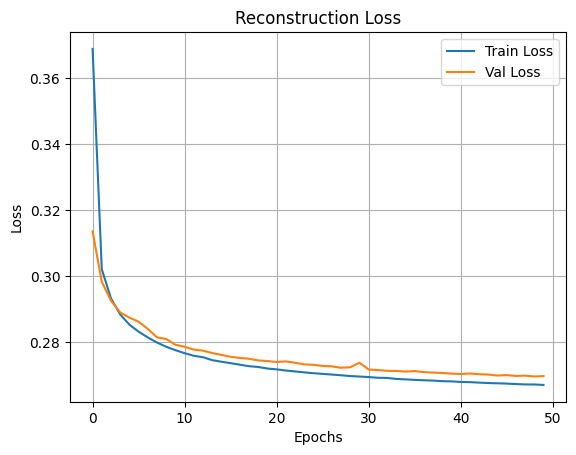

In [6]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Reconstruction Loss")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


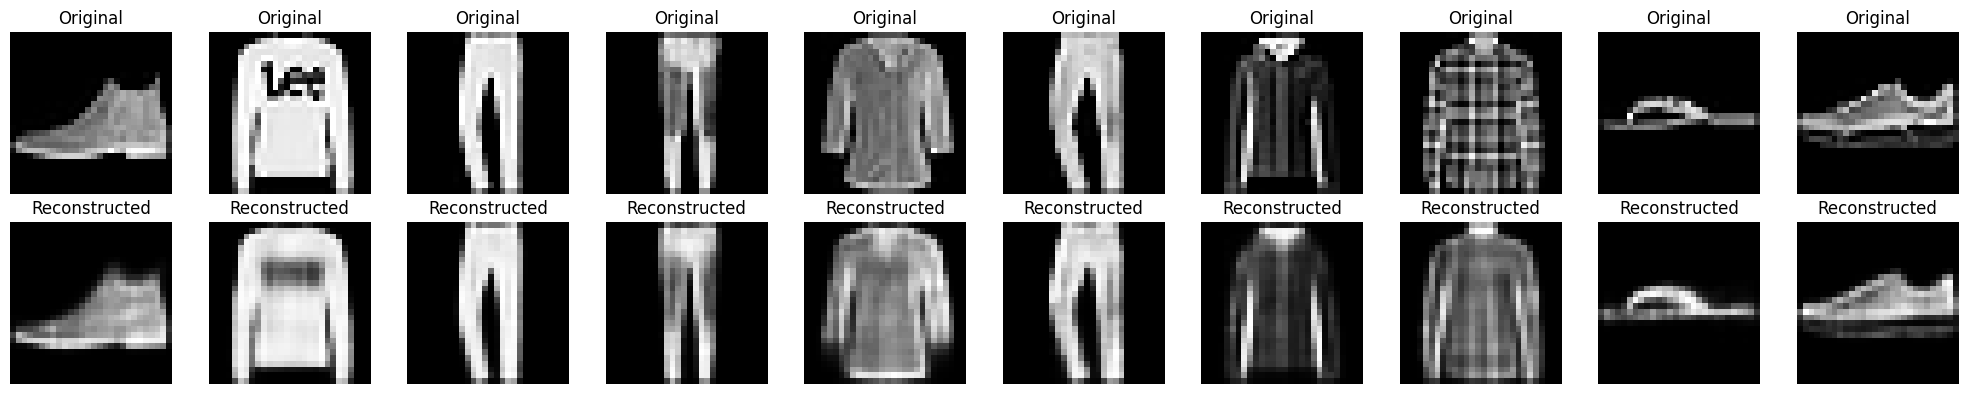

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()

**USING CNN**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [11]:
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

In [12]:
input_img = layers.Input(shape=(28, 28, 1))

In [13]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
bottleneck_1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name='bottleneck_1')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(bottleneck_1)
bottleneck_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='bottleneck_2')(x)

In [14]:
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(bottleneck_2)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [15]:
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    callbacks=[early_stop]
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 183ms/step - loss: 0.4387 - val_loss: 0.3197
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - loss: 0.3150 - val_loss: 0.3127
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 178ms/step - loss: 0.3105 - val_loss: 0.3098
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 174ms/step - loss: 0.3069 - val_loss: 0.3085
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - loss: 0.3050 - val_loss: 0.3070
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 174ms/step - loss: 0.3045 - val_loss: 0.3055
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - loss: 0.3038 - val_loss: 0.3045
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 177ms/step - loss: 0.3022 - val_loss: 0.3037
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 178ms/step - loss: 0.3017 - val_loss: 0.3032
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 173ms/step - loss: 0.3013 - val_loss: 0.3028
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - loss: 0.3004 - val_loss: 0.3022
Epoch 12/50
46

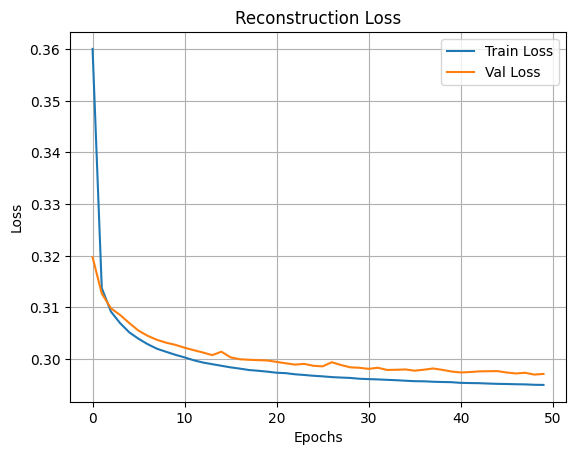

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Reconstruction Loss")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


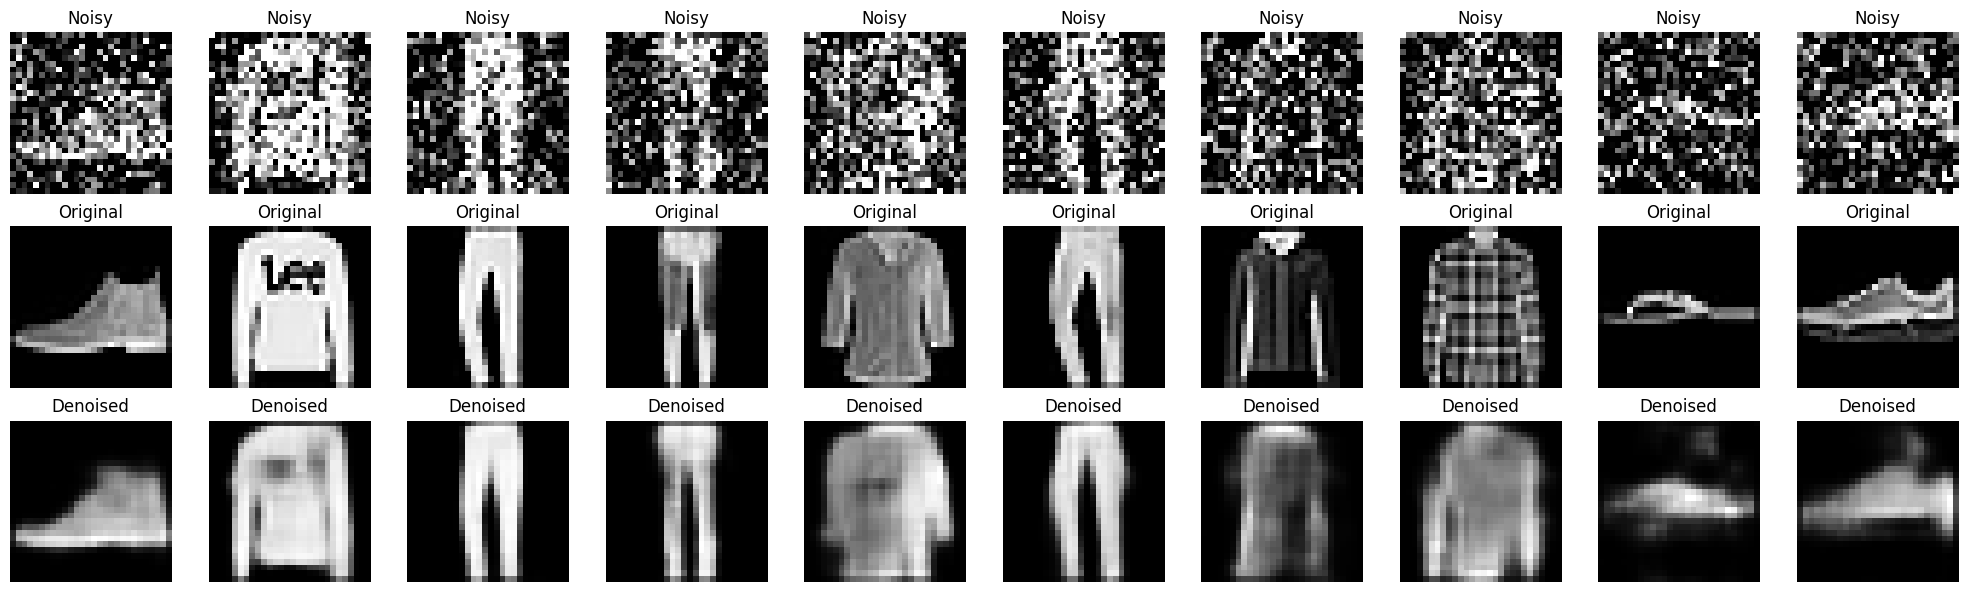

In [19]:
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


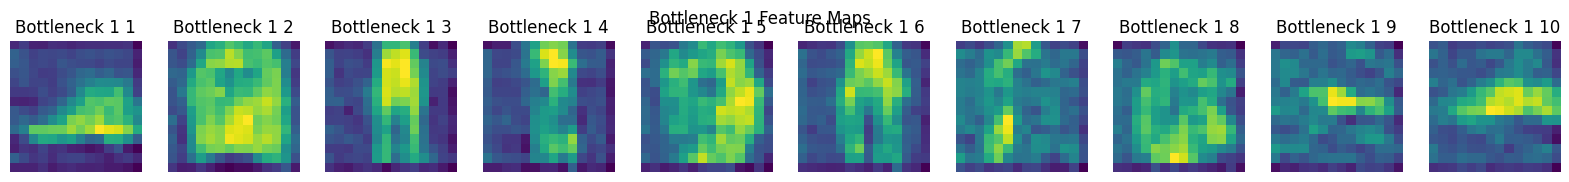

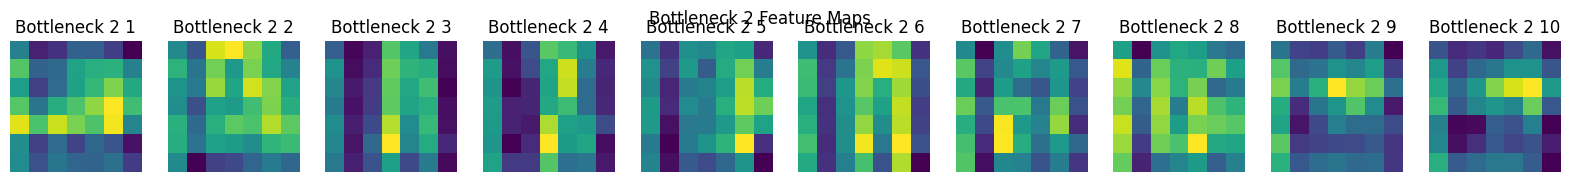

In [20]:
model_b1 = models.Model(autoencoder.input, autoencoder.get_layer('bottleneck_1').output)
model_b2 = models.Model(autoencoder.input, autoencoder.get_layer('bottleneck_2').output)

b1_feats = model_b1.predict(x_test_noisy[:10])
b2_feats = model_b2.predict(x_test_noisy[:10])

def visualize_bottleneck(feats, title):
    plt.figure(figsize=(20, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        avg_map = feats[i].mean(axis=-1)
        plt.imshow(avg_map, cmap='viridis')
        plt.axis('off')
        plt.title(f"{title} {i+1}")
    plt.suptitle(f"{title} Feature Maps")
    plt.show()

visualize_bottleneck(b1_feats, "Bottleneck 1")
visualize_bottleneck(b2_feats, "Bottleneck 2")